In [9]:
import pandas
# load the dataset
dataset = pandas.read_csv('horoscope_processed.csv')
dataset.head()

,Unnamed: 0,Unnamed: 0.1,temp,sign,day_of_week,horoscope,img_path,keyTerms
0,0,0,0.841130,Aries,Monday,It might be more than one hundred problem. Whe...,imgs/img_1.png,certain scenario
1,1,1,0.944679,Taurus,Monday,How much do you want to be? Part of its abilit...,imgs/img_1.png,certain people
2,2,2,0.947067,Gemini,Monday,Its important to asked that karmatic front on ...,imgs/img_1.png,karmatic front
3,3,3,0.879236,Cancer,Monday,If you have felt passionate about your need to...,imgs/img_1.png,fun
4,4,4,0.931235,Leo,Monday,A certain person are less causing a someone th...,imgs/img_1.png,drivers


In [10]:
#Fetch wordcount for each abstract
dataset['word_count'] = dataset['horoscope'].apply(lambda x: len(str(x).split(" ")))
dataset[['horoscope','word_count']].head()

,horoscope,word_count
0,It might be more than one hundred problem. Whe...,86
1,How much do you want to be? Part of its abilit...,94
2,Its important to asked that karmatic front on ...,86
3,If you have felt passionate about your need to...,92
4,A certain person are less causing a someone th...,88


In [13]:
dataset.word_count.describe()
freq = pandas.Series(' '.join(dataset['horoscope']).split()).value_counts()[:20]
freq

to       3608
you      2591
a        2140
the      1463
of       1443
be       1329
and      1322
is       1165
in       1065
can       971
your      965
it        818
that      775
or        771
You       609
what      579
have      555
we        537
might     505
are       497
dtype: int64

In [14]:
#Identify uncommon words
freq1 =  pandas.Series(' '.join(dataset 
         ['horoscope']).split()).value_counts()[-20:]
freq1

despair.         1
judgment!        1
encouragement    1
foundations      1
stressfully.     1
uncovering       1
classice         1
song,            1
mastered         1
noticed.         1
misery           1
speeking         1
lifting          1
afraw            1
odds.            1
amiss            1
reconspire       1
discreet.        1
admittedly       1
athor            1
dtype: int64

In [15]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [18]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jchoi19/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/jchoi19/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [253]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", 
             "one", "two", "new", "previously", "shown","something","certain","regarding",
            "could","would",'situation','thing',"change","want",'need',"help","right",
             "part","bit","feel","between","someone","others","other","put"]
stop_words = stop_words.union(new_words)

In [254]:
corpus = []
for i in range(0, 840):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['horoscope'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [255]:
corpus[12]

'sun venus relating career nt mean may make use time even pushing away hard channel try look closely going come dwelling next morning perhaps enable find giving energy order get going challenging best friend still everything shirk future term past sift love circulation clear push tune recognition'

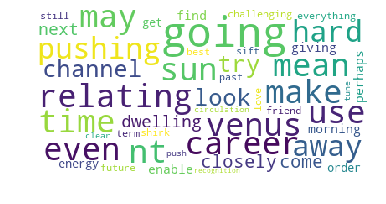

In [256]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus[12]))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [257]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [258]:
list(cv.vocabulary_.keys())[:10]

['might',
 'hundred',
 'problem',
 'whether',
 'suggest',
 'scenario',
 'probably',
 'occupy',
 'head',
 'away']

[Text(0, 0, 'way'),
 Text(0, 0, 'might'),
 Text(0, 0, 'time'),
 Text(0, 0, 'see'),
 Text(0, 0, 'make'),
 Text(0, 0, 'much'),
 Text(0, 0, 'know'),
 Text(0, 0, 'may'),
 Text(0, 0, 'come'),
 Text(0, 0, 'take'),
 Text(0, 0, 'find'),
 Text(0, 0, 'get'),
 Text(0, 0, 'believe'),
 Text(0, 0, 'people'),
 Text(0, 0, 'world'),
 Text(0, 0, 'person'),
 Text(0, 0, 'issue'),
 Text(0, 0, 'many'),
 Text(0, 0, 'give'),
 Text(0, 0, 'sense')]

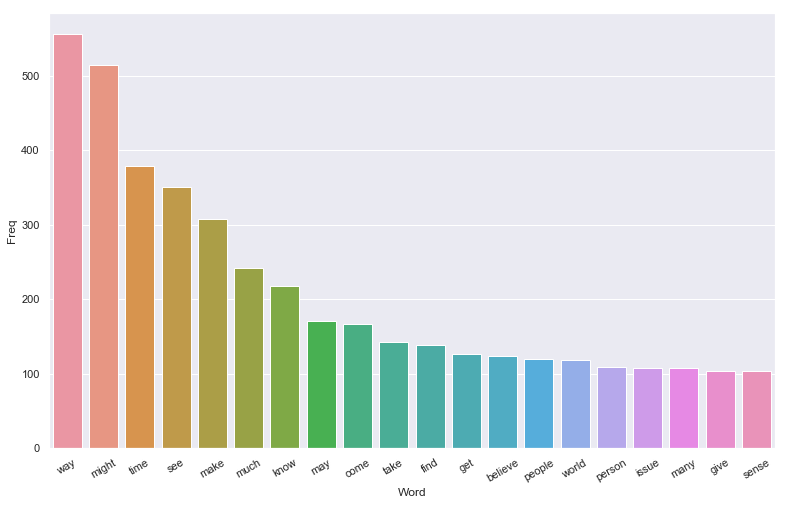

In [259]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

            Bi-gram  Freq
0        area world    47
1         way might    37
2      might appear    36
3       make happen    20
4       good reason    20
5        coming way    19
6     might believe    18
7          soon see    16
8        make sense    16
9       many people    16
10       might time    16
11        might see    15
12         way make    15
13  particular area    15
14     look closely    14
15       much might    14
16       make point    14
17         come way    14
18      make effort    12
19       see happen    12


[Text(0, 0, 'area world'),
 Text(0, 0, 'way might'),
 Text(0, 0, 'might appear'),
 Text(0, 0, 'make happen'),
 Text(0, 0, 'good reason'),
 Text(0, 0, 'coming way'),
 Text(0, 0, 'might believe'),
 Text(0, 0, 'soon see'),
 Text(0, 0, 'make sense'),
 Text(0, 0, 'many people'),
 Text(0, 0, 'might time'),
 Text(0, 0, 'might see'),
 Text(0, 0, 'way make'),
 Text(0, 0, 'particular area'),
 Text(0, 0, 'look closely'),
 Text(0, 0, 'much might'),
 Text(0, 0, 'make point'),
 Text(0, 0, 'come way'),
 Text(0, 0, 'make effort'),
 Text(0, 0, 'see happen')]

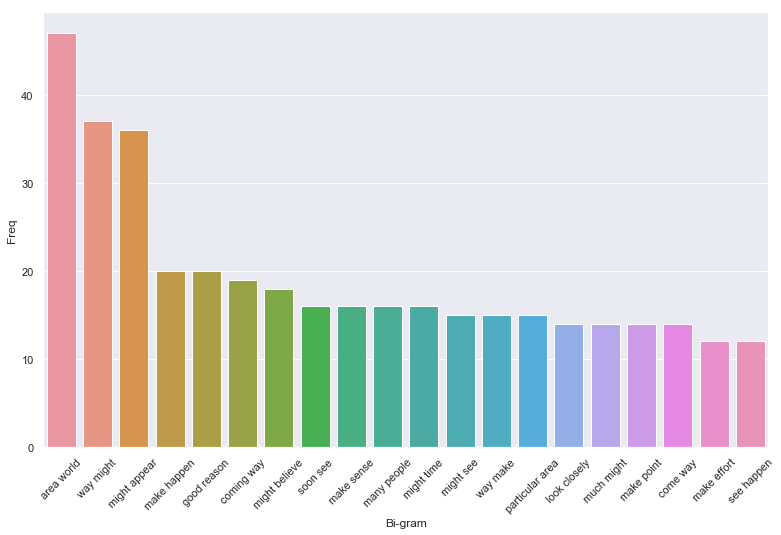

In [260]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                        Tri-gram  Freq
0               short space time     6
1                take action way     5
2               area world might     5
3                  many year ago     4
4          particular area world     4
5       arrangement might appear     3
6                see good reason     3
7               way might appear     3
8   might understandably believe     3
9                  able see much     3
10              make happen time     2
11              much might aware     2
12                way appear see     2
13               much might wish     2
14            area world believe     2
15            coming way shortly     2
16     become increasingly aware     2
17                 old saying go     2
18              area world aware     2
19        happening coming event     2


[Text(0, 0, 'short space time'),
 Text(0, 0, 'take action way'),
 Text(0, 0, 'area world might'),
 Text(0, 0, 'many year ago'),
 Text(0, 0, 'particular area world'),
 Text(0, 0, 'arrangement might appear'),
 Text(0, 0, 'see good reason'),
 Text(0, 0, 'way might appear'),
 Text(0, 0, 'might understandably believe'),
 Text(0, 0, 'able see much'),
 Text(0, 0, 'make happen time'),
 Text(0, 0, 'much might aware'),
 Text(0, 0, 'way appear see'),
 Text(0, 0, 'much might wish'),
 Text(0, 0, 'area world believe'),
 Text(0, 0, 'coming way shortly'),
 Text(0, 0, 'become increasingly aware'),
 Text(0, 0, 'old saying go'),
 Text(0, 0, 'area world aware'),
 Text(0, 0, 'happening coming event')]

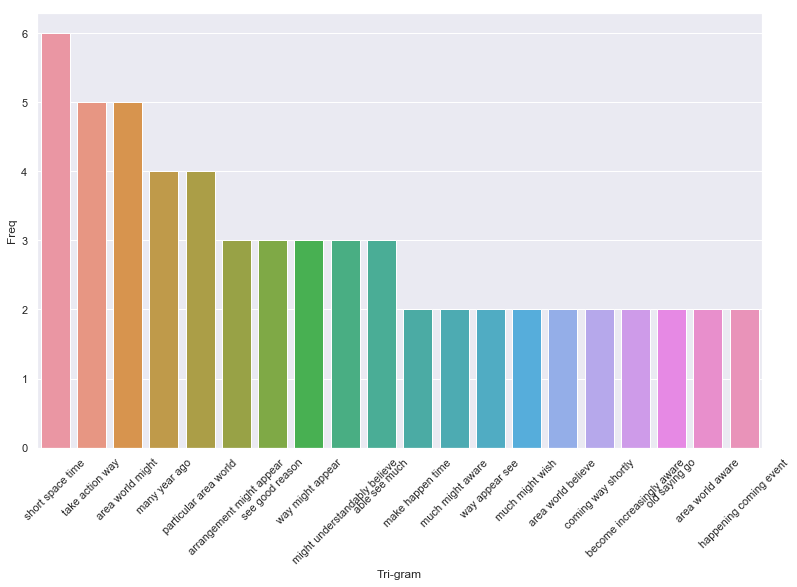

In [261]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [262]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
# fetch document for which keywords needs to be extracted
doc=corpus[3]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [263]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    topn = len(sorted_items) - topn
    #use only topn items from vector
    sorted_items = sorted_items[topn:]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
felt passionate understand medicine fitness may wanting start go thing different job nowhere wanting clearer gradually sharp keep space may complain quick fix played service level activity therefore home little fun make home recently work weekend

Keywords:
space 0.119
recently 0.112
different 0.11
start 0.109
little 0.106
work 0.104
keep 0.103
level 0.094
go 0.089
make 0.058


In [264]:
# fetch document for which keywords needs to be extracted
keywords_dic = {}
for i in range(840):
    doc=corpus[i]
    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    k = 7
    if i in [124,245,415,439,474,526,583,588,667,734,784,21,400]:
        k = 10
    if i in [685,774,814]:
        k = 13
    keywords=extract_topn_from_vector(feature_names,sorted_items,k)
    list_nouns = []
    for keys in keywords:
        curr = nltk.tag.pos_tag([keys])
        if curr[0][1] in ["NN","NNS"]:
            list_nouns.append(keys)
    keywords_dic[i] = list_nouns

In [265]:
from collections import OrderedDict
csv_list = []
key_list = []
for i in keywords_dic:
    if len(keywords_dic[i]) == 0:
        print("error",i)
    csv_list.append(keywords_dic[i])
    key_list.append(keywords_dic[i][0])

In [266]:
import pandas as pd

In [267]:
csv_input = pd.read_csv("horoscope_processed.csv")
csv_input['new_keyTerms_list'] = csv_list
csv_input['new_keyTerms'] = key_list
csv_input.to_csv("horoscope_processed2.csv")
#print(list_keyterms)

In [268]:
csv_input

,Unnamed: 0,Unnamed: 0.1,temp,sign,day_of_week,horoscope,img_path,keyTerms,new_keyTerms_list,new_keyTerms
0,0,0,0.841130,Aries,Monday,It might be more than one hundred problem. Whe...,imgs/img_1.png,certain scenario,"[accept, person, time]",accept
1,1,1,0.944679,Taurus,Monday,How much do you want to be? Part of its abilit...,imgs/img_1.png,certain people,"[reason, people]",reason
2,2,2,0.947067,Gemini,Monday,Its important to asked that karmatic front on ...,imgs/img_1.png,karmatic front,"[reason, accept, mind, person, way]",reason
3,3,3,0.879236,Cancer,Monday,If you have felt passionate about your need to...,imgs/img_1.png,fun,"[start, work, level]",start
4,4,4,0.931235,Leo,Monday,A certain person are less causing a someone th...,imgs/img_1.png,drivers,"[person, way]",person
5,5,5,0.840355,Virgo,Monday,"Before we can wish to climb the ways, these ar...",imgs/img_1.png,tension,"[think, way, chance]",think
6,6,6,0.821136,Libra,Monday,We often feel inclined to give some initiative...,imgs/img_1.png,ideas,"[offer, area, effort, world, time]",offer
7,7,7,0.928270,Scorpio,Monday,You could be inclined to regain control over a...,imgs/img_1.png,control,"[think, control, effort]",think
8,8,8,0.929995,Sagittarius,Monday,The sky is being supportive and imaginatively ...,imgs/img_1.png,quarters,"[effort, time, way]",effort
9,9,9,0.919776,Capricorn,Monday,We know anything they ve discovered most or mi...,imgs/img_1.png,favorite present,"[become, issue, people]",become
